# Implémentation

## 1- QDA

In [1]:
import numpy as np

class QDA:
    def __init__(self):
        self.classes_ = None
        self.means_ = {}
        self.covariances_ = {}
        self.priors_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.covariances_[cls] = np.cov(X_cls, rowvar=False)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]

    def _gaussian_density(self, x, mean, covariance):
        size = len(mean)
        # Régularisation
        epsilon = 1e-6
        covariance += np.eye(size) * epsilon

        det = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)
        norm_const = 1.0 / (np.power(2 * np.pi, size / 2) * np.sqrt(det))
        x_diff = x - mean
        return norm_const * np.exp(-0.5 * x_diff @ inv_cov @ x_diff.T)

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for cls in self.classes_:
                likelihood = self._gaussian_density(x, self.means_[cls], self.covariances_[cls])
                class_probs[cls] = likelihood * self.priors_[cls]
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)


## 2- LDA

In [2]:
import numpy as np

class LDA:
    def __init__(self):
        self.classes_ = None
        self.means_ = {}
        self.covariances_ = {}
        self.priors_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.covariances_ = np.cov(X, rowvar=False)
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]

    def _gaussian_density(self, x, mean, covariance):
        size = len(mean)
        # Régularisation
        epsilon = 1e-6
        covariance += np.eye(size) * epsilon

        det = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)
        norm_const = 1.0 / (np.power(2 * np.pi, size / 2) * np.sqrt(det))
        x_diff = x - mean
        return norm_const * np.exp(-0.5 * x_diff @ inv_cov @ x_diff.T)

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for cls in self.classes_:
                likelihood = self._gaussian_density(x, self.means_[cls], self.covariances_)
                class_probs[cls] = likelihood * self.priors_[cls]
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)


## 3- Naive Bayes

In [3]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.classes_ = None  # Classes uniques
        self.means_ = {}      # Moyennes pour chaque classe et chaque feature
        self.variances_ = {}  # Variances pour chaque classe et chaque feature
        self.priors_ = {}     # Probabilités a priori pour chaque classe

    def fit(self, X, y):
        """
        Entraîne le modèle avec les données d'entraînement X et les labels y.
        """
        # Identifier les classes uniques
        self.classes_ = np.unique(y)
        
        for cls in self.classes_:
            # Sélectionner les données appartenant à la classe `cls`
            X_cls = X[y == cls]
            
            # Calculer la moyenne et la variance pour chaque feature de cette classe
            self.means_[cls] = np.mean(X_cls, axis=0)
            self.variances_[cls] = np.var(X_cls, axis=0)
            
            # Calculer la probabilité a priori pour cette classe
            self.priors_[cls] = X_cls.shape[0] / X.shape[0]

    def _gaussian_density(self, x, mean, variance):
        """
        Calcule la densité de probabilité gaussienne pour un point x.
        """
        eps = 1e-6  # Pour éviter les divisions par zéro
        coefficient = 1 / np.sqrt(2 * np.pi * (variance + eps))
        exponent = -((x - mean) ** 2) / (2 * (variance + eps))
        return coefficient * np.exp(exponent)

    def predict(self, X):
        """
        Prédit les classes pour les données X.
        """
        predictions = []
        
        for x in X:
            class_probs = {}
            
            for cls in self.classes_:
                # Calculer la probabilité a posteriori pour la classe `cls`
                likelihood = np.prod(self._gaussian_density(x, self.means_[cls], self.variances_[cls]))
                class_probs[cls] = likelihood * self.priors_[cls]
            
            # Prendre la classe avec la probabilité maximale
            predictions.append(max(class_probs, key=class_probs.get))
        
        return np.array(predictions)


# Exemple d'utilisation

## 1- Exemple QDA

Forme des données X_train : (150, 2)
Forme des labels y_train : (150,)


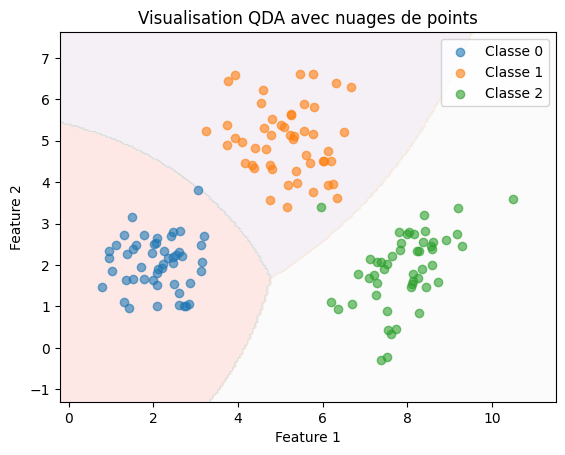

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer un seed pour la reproductibilité
np.random.seed(42)

# Générer des données pour la classe 0
class_0 = np.random.multivariate_normal(
    mean=[2, 2],
    cov=[[0.5, 0.1], [0.1, 0.5]],
    size=50
)

# Générer des données pour la classe 1
class_1 = np.random.multivariate_normal(
    mean=[5, 5],
    cov=[[0.8, -0.2], [-0.2, 0.8]],
    size=50
)

# Générer des données pour la classe 2
class_2 = np.random.multivariate_normal(
    mean=[8, 2],
    cov=[[0.6, 0.2], [0.2, 0.6]],
    size=50
)

# Combiner les données
X_train = np.vstack((class_0, class_1, class_2))

# Créer les labels correspondants
y_train = np.array([0] * 50 + [1] * 50 + [2] * 50)

print("Forme des données X_train :", X_train.shape)
print("Forme des labels y_train :", y_train.shape)

# Initialiser et entraîner votre modèle QDA from scratch
qda = QDA()  # Assurez-vous que QDA est défini dans le même script ou importé
qda.fit(X_train, y_train)

# Générer une grille de points couvrant tout l'espace
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prévoir les classes pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([qda.predict(point.reshape(1, -1))[0] for point in grid_points])  # Assurez-vous que `predict` retourne une classe
Z = Z.reshape(xx.shape)

# Créer un fond coloré pour les régions de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Ajouter les nuages de points (données d'entraînement)
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], 
                X_train[y_train == label, 1], 
                label=f'Classe {label}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Visualisation QDA avec nuages de points')
plt.show()


## 2- Exemple LDA

Forme des données X_train : (150, 2)
Forme des labels y_train : (150,)


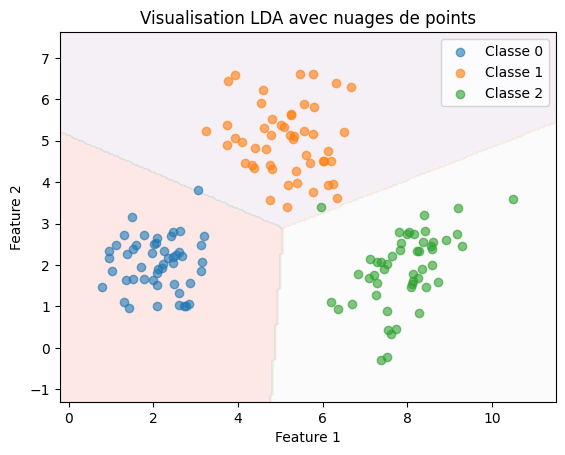

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer un seed pour la reproductibilité
np.random.seed(42)

# Générer des données pour la classe 0
class_0 = np.random.multivariate_normal(
    mean=[2, 2],
    cov=[[0.5, 0.1], [0.1, 0.5]],
    size=50
)

# Générer des données pour la classe 1
class_1 = np.random.multivariate_normal(
    mean=[5, 5],
    cov=[[0.8, -0.2], [-0.2, 0.8]],
    size=50
)

# Générer des données pour la classe 2
class_2 = np.random.multivariate_normal(
    mean=[8, 2],
    cov=[[0.6, 0.2], [0.2, 0.6]],
    size=50
)

# Combiner les données
X_train = np.vstack((class_0, class_1, class_2))

# Créer les labels correspondants
y_train = np.array([0] * 50 + [1] * 50 + [2] * 50)

print("Forme des données X_train :", X_train.shape)
print("Forme des labels y_train :", y_train.shape)

# Initialiser et entraîner votre modèle QDA from scratch
qda = LDA()  # Assurez-vous que QDA est défini dans le même script ou importé
qda.fit(X_train, y_train)

# Générer une grille de points couvrant tout l'espace
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prévoir les classes pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([qda.predict(point.reshape(1, -1))[0] for point in grid_points])  # Assurez-vous que `predict` retourne une classe
Z = Z.reshape(xx.shape)

# Créer un fond coloré pour les régions de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Ajouter les nuages de points (données d'entraînement)
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], 
                X_train[y_train == label, 1], 
                label=f'Classe {label}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Visualisation LDA avec nuages de points')
plt.show()

## 3- Exemple Naive Bayes

Forme des données X_train : (150, 2)
Forme des labels y_train : (150,)


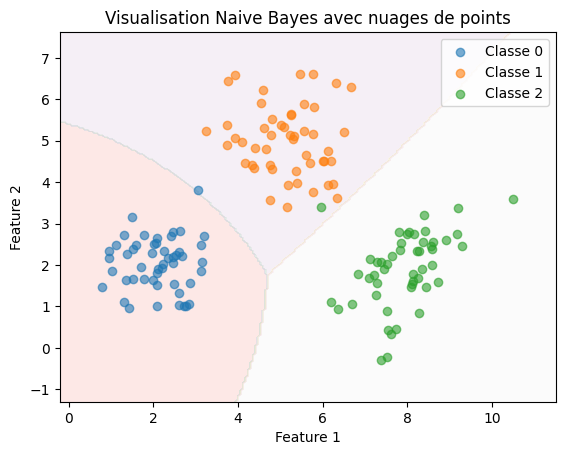

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fixer un seed pour la reproductibilité
np.random.seed(42)

# Générer des données pour la classe 0
class_0 = np.random.multivariate_normal(
    mean=[2, 2],
    cov=[[0.5, 0.1], [0.1, 0.5]],
    size=50
)

# Générer des données pour la classe 1
class_1 = np.random.multivariate_normal(
    mean=[5, 5],
    cov=[[0.8, -0.2], [-0.2, 0.8]],
    size=50
)

# Générer des données pour la classe 2
class_2 = np.random.multivariate_normal(
    mean=[8, 2],
    cov=[[0.6, 0.2], [0.2, 0.6]],
    size=50
)

# Combiner les données
X_train = np.vstack((class_0, class_1, class_2))

# Créer les labels correspondants
y_train = np.array([0] * 50 + [1] * 50 + [2] * 50)

print("Forme des données X_train :", X_train.shape)
print("Forme des labels y_train :", y_train.shape)

# Initialiser et entraîner votre modèle QDA from scratch
qda = NaiveBayes()  # Assurez-vous que QDA est défini dans le même script ou importé
qda.fit(X_train, y_train)

# Générer une grille de points couvrant tout l'espace
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prévoir les classes pour chaque point de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([qda.predict(point.reshape(1, -1))[0] for point in grid_points])  # Assurez-vous que `predict` retourne une classe
Z = Z.reshape(xx.shape)

# Créer un fond coloré pour les régions de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Ajouter les nuages de points (données d'entraînement)
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, 0], 
                X_train[y_train == label, 1], 
                label=f'Classe {label}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Visualisation Naive Bayes avec nuages de points')
plt.show()